# Import data_utils

In [ ]:
# clone GitHub repo
!git clone https://github.com/leap-stc/ClimSim.git
%cd ClimSim
!pip install .

Cloning into 'ClimSim'...
remote: Enumerating objects: 4506, done.
remote: Counting objects: 100% (811/811), done.
remote: Compressing objects: 100% (357/357), done.
remote: Total 4506 (delta 461), reused 718 (delta 441), pack-reused 3695
Receiving objects: 100% (4506/4506), 140.16 MiB | 20.75 MiB/s, done.
Resolving deltas: 100% (1554/1554), done.
Updating files: 100% (2068/2068), done.
/content/ClimSim
Processing /content/ClimSim
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.6 MB/s eta 0:00:00
  Created wheel for climsim-utils: filename=climsim_utils-0.0.1-py3-none-any.whl size=14489 sha256=4b43ae2c1f739c37d3d2aef5556159fe9f29193bc2157682006d010fd5e69e74
  Stored in directory: /tmp/pip-ephem-wheel-cache-77v7ng02/wheels/a2/10/6e/125ae0c7cf1c521a7afaa0ba206e930d032a286728ae1a9103
Successfully built climsim-utils


In [ ]:
from climsim_utils.data_utils import *

# Instantiate class

In [ ]:
# Install Git LFS
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/jammy.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Detected apt version as 2.4.10
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... Packagecloud gpg key imported to /etc/apt/keyrings/github_git-lfs-archive-keyring.gpg
done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be upgraded:
  git-lfs
1 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Need to get 7,244 kB of archives.
After this operation, 5,783 kB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu jammy/main amd64 git-lfs amd64 3.4.0 [7,244 kB]
Fetched 7,244 kB in 1s (7,570 kB/s)
debconf: unable to initialize frontend: Dialog
debc

In [ ]:
!git clone https://huggingface.co/datasets/LEAP/subsampled_low_res

Cloning into 'subsampled_low_res'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 51 (delta 10), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (51/51), 6.45 KiB | 550.00 KiB/s, done.
Filtering content: 100% (12/12), 8.46 GiB | 27.84 MiB/s, done.


In [ ]:
# show working directory
!pwd
# list working directory
print(os.listdir())

/content/ClimSim
['tests', 'README.md', 'grid_info', 'climsim_utils.egg-info', 'baseline_models', 'climsim_utils', 'evaluation', 'subsampled_low_res', '.gitignore', '.git', 'website', '.github', 'preprocessing', 'dataset_statistics', 'demo_notebooks', 'figures', 'setup.py', 'build', 'ARCHITECTURE.md', 'LICENSE']


In [ ]:
#grid_path = '/ocean/projects/atm200007p/jlin96/ClimSim/grid_info/ClimSim_low-res_grid-info.nc'
#norm_path = '/ocean/projects/atm200007p/jlin96/ClimSim/preprocessing/normalizations/'

# change working directories
grid_path = '/content/ClimSim/grid_info/ClimSim_low-res_grid-info.nc'
norm_path = '/content/ClimSim/preprocessing/normalizations/'

grid_info = xr.open_dataset(grid_path)
input_mean = xr.open_dataset(norm_path + 'inputs/input_mean.nc')
input_max = xr.open_dataset(norm_path + 'inputs/input_max.nc')
input_min = xr.open_dataset(norm_path + 'inputs/input_min.nc')
output_scale = xr.open_dataset(norm_path + 'outputs/output_scale.nc')

data = data_utils(grid_info = grid_info,
                  input_mean = input_mean,
                  input_max = input_max,
                  input_min = input_min,
                  output_scale = output_scale)

# set variables to V1 subset
data.set_to_v1_vars()

# Load training and validation data

In [ ]:
# Change this path to your own
# data_path = '/ocean/projects/atm200007p/jlin96/neurips_proj/e3sm_train_npy/'
data_path = '/content/ClimSim/subsampled_low_res/'

train_input_path = data_path + 'train_input.npy'
train_target_path = data_path + 'train_target.npy'
val_input_path = data_path + 'val_input.npy'
val_target_path = data_path + 'val_target.npy'


data.input_train = data.load_npy_file(train_input_path)
data.target_train = data.load_npy_file(train_target_path)
data.input_val = data.load_npy_file(val_input_path)
data.target_val = data.load_npy_file(val_target_path)

In [ ]:
#subsampled again since ssr and rnn models would crash using original data size

random_indices = np.random.choice(data.input_train.shape[0], 3840, replace=False)
data.input_train = data.input_train[random_indices]
random_indices = np.random.choice(data.target_train.shape[0], 3840, replace=False)
data.target_train = data.target_train[random_indices]
random_indices = np.random.choice(data.input_val.shape[0], 384, replace=False)
data.input_val = data.input_val[random_indices]
random_indices = np.random.choice(data.target_val.shape[0], 384, replace=False)
data.target_val = data.target_val[random_indices]

# Train models

### Train constant prediction model

$\hat{y} = E[y_{train}]$

In [ ]:
const_model = data.target_train.mean(axis = 0)

### Train multiple linear regression model

$\beta = {(X_{train}^TX_{train})}^{-1}X_{train}^Ty_{train}$

$\hat{y} = X_{input}^T \beta$

where $X_{train}$ and $X_{input}$ correspond to the training data and the input data you would like to inference on, respectively. $X_{train}$ and $X_{input}$ both have a column of ones concatenated to the feature space for the bias.


##### adding bias unit

In [ ]:
X = data.input_train
bias_vector = np.ones((X.shape[0], 1))
X = np.concatenate((X, bias_vector), axis=1)

##### create model

In [ ]:
mlr_weights = np.linalg.inv(X.transpose()@X)@X.transpose()@data.target_train

### Train your models here

In [ ]:
#SVR (linear)
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_val = data.input_train, data.input_val
y_train, y_val = data.target_train, data.target_val

svr = SVR(kernel='linear')  # choose kernel type

# use MultiOutputRegressor SVR
multi_output_svr = MultiOutputRegressor(svr)

# train model
multi_output_svr.fit(X_train, y_train)

In [ ]:
# Neural Network Regression
import numpy as np
import tensorflow as tf
from tensorflow import keras

X_train, X_val = data.input_train, data.input_val
y_train, y_val = data.target_train, data.target_val

# create Neural Network Regression
model = keras.Sequential([
    keras.layers.Input(shape=(124,)),  # Input layer
    keras.layers.Dense(100, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(128)  # output layer
])
#感觉一个hidden layer的graph最fit

# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# test model
loss = model.evaluate(X_val, y_val)

Epoch 1/100
120/120 [==============================] - 1s 2ms/step - loss: 0.0234
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 10/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 11/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 12/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 13/100


# Evaluate on validation data

### Set pressure grid

In [ ]:
data.set_pressure_grid(data_split = 'val')

### Load predictions

In [ ]:
# Constant Prediction
const_pred_val = np.repeat(const_model[np.newaxis, :], data.target_val.shape[0], axis = 0)

# Multiple Linear Regression
X_val = data.input_val
bias_vector_val = np.ones((X_val.shape[0], 1))
X_val = np.concatenate((X_val, bias_vector_val), axis=1)
mlr_pred_val = X_val@mlr_weights

# Load your prediction here
svr_pred = multi_output_svr.predict(X_val)
nnr_pred = model.predict(X_val)


# Load predictions into data_utils object
data.model_names = ['const', 'mlr','svr','nnr'] # add names of your models here
preds = [const_pred_val, mlr_pred_val, svr_pred,nnr_pred] # add your custom predictions here
data.preds_val = dict(zip(data.model_names, preds))

(384, 128)
(384, 128)


### Weight predictions and target

1. Undo output scaling

2.  Weight vertical levels by dp/g

3. Weight horizontal area of each grid cell by a[x]/mean(a[x])

4. Convert units to a common energy unit

In [ ]:
data.reweight_target(data_split = 'val')
data.reweight_preds(data_split = 'val')

### Set and calculate metrics

In [ ]:
data.metrics_names = ['MAE', 'RMSE', 'bias']
data.create_metrics_df(data_split = 'val')

### Create plots

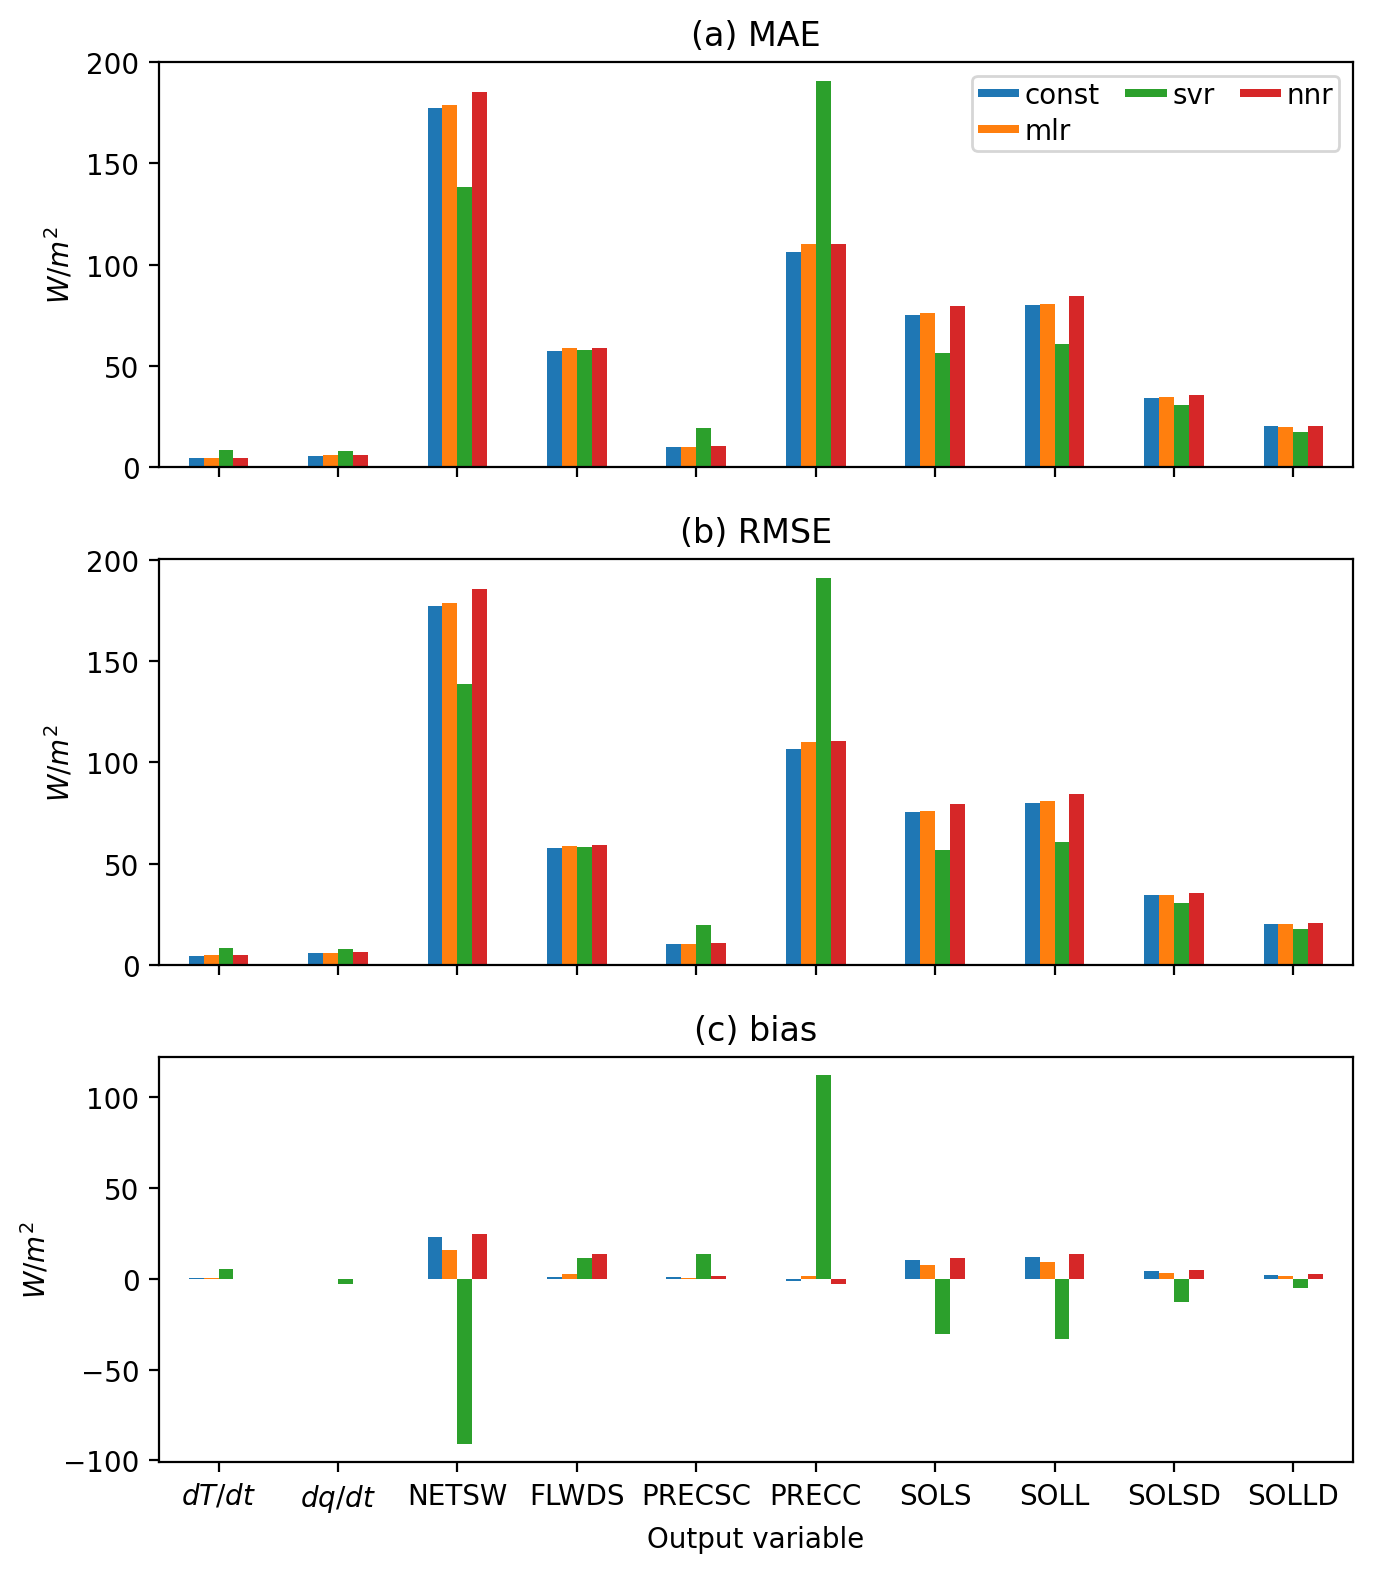

In [ ]:
# set plotting settings
%config InlineBackend.figure_format = 'retina'
letters = string.ascii_lowercase

# create custom dictionary for plotting
dict_var = data.metrics_var_val
plot_df_byvar = {}
for metric in data.metrics_names:
    plot_df_byvar[metric] = pd.DataFrame([dict_var[model][metric] for model in data.model_names],
                                               index=data.model_names)
    plot_df_byvar[metric] = plot_df_byvar[metric].rename(columns = data.var_short_names).transpose()

# plot figure
fig, axes = plt.subplots(nrows  = len(data.metrics_names), sharex = True)
for i in range(len(data.metrics_names)):
    plot_df_byvar[data.metrics_names[i]].plot.bar(
        legend = False,
        ax = axes[i])
    if data.metrics_names[i] != 'R2':
        axes[i].set_ylabel('$W/m^2$')
    else:
        axes[i].set_ylim(0,1)

    axes[i].set_title(f'({letters[i]}) {data.metrics_names[i]}')
axes[i].set_xlabel('Output variable')
axes[i].set_xticklabels(plot_df_byvar[data.metrics_names[i]].index, \
    rotation=0, ha='center')

axes[0].legend(columnspacing = .9,
               labelspacing = .3,
               handleheight = .07,
               handlelength = 1.5,
               handletextpad = .2,
               borderpad = .2,
               ncol = 3,
               loc = 'upper right')
fig.set_size_inches(7,8)
fig.tight_layout()

If you trained models with different hyperparameters, use the ones that performed the best on validation data for evaluation on scoring data.

## Evaluate on scoring data

#### Do this at the VERY END (when you have finished tuned the hyperparameters for your  model and are seeking a final evaluation)

### Load scoring data

In [ ]:
scoring_input_path = data_path + "scoring_input.npy"
scoring_target_path = data_path + "scoring_target.npy"

# path to target input
data.input_scoring = np.load(scoring_input_path)

# path to target output
data.target_scoring = np.load(scoring_target_path)

In [ ]:
random_indices = np.random.choice(data.input_scoring.shape[0], 3840, replace=False)
data.input_scoring = data.input_scoring[random_indices]
random_indices = np.random.choice(data.target_scoring.shape[0], 3840, replace=False)
data.target_scoring = data.target_scoring[random_indices]

### Set pressure grid

In [ ]:
data.set_pressure_grid(data_split = 'scoring')

### Load predictions

In [ ]:
# constant prediction
const_pred_scoring = np.repeat(const_model[np.newaxis, :], data.target_scoring.shape[0], axis = 0)

# multiple linear regression
X_scoring = data.input_scoring
bias_vector_scoring = np.ones((X_scoring.shape[0], 1))
X_scoring = np.concatenate((X_scoring, bias_vector_scoring), axis=1)
mlr_pred_scoring = X_scoring@mlr_weights

# Your model prediction here
svr_pred_scoring = multi_output_svr.predict(data.input_scoring)

nrr_pred_scoring = model.predict(data.input_scoring)

# Load predictions into object
data.model_names = ['const', 'mlr', 'svr', "nnr"] # model name here
preds = [const_pred_scoring, mlr_pred_scoring, svr_pred_scoring, nrr_pred_scoring] # add prediction here
data.preds_scoring = dict(zip(data.model_names, preds))

(3840, 128)
(3840, 128)
120/120 [==============================] - 0s 2ms/step


### Weight predictions and target

1. Undo output scaling

2.  Weight vertical levels by dp/g

3. Weight horizontal area of each grid cell by a[x]/mean(a[x])

4. Convert units to a common energy unit

In [ ]:
# weight predictions and target
data.reweight_target(data_split = 'scoring')
data.reweight_preds(data_split = 'scoring')

# set and calculate metrics
data.metrics_names = ['MAE', 'RMSE', 'bias']
data.create_metrics_df(data_split = 'scoring')

### Create plots

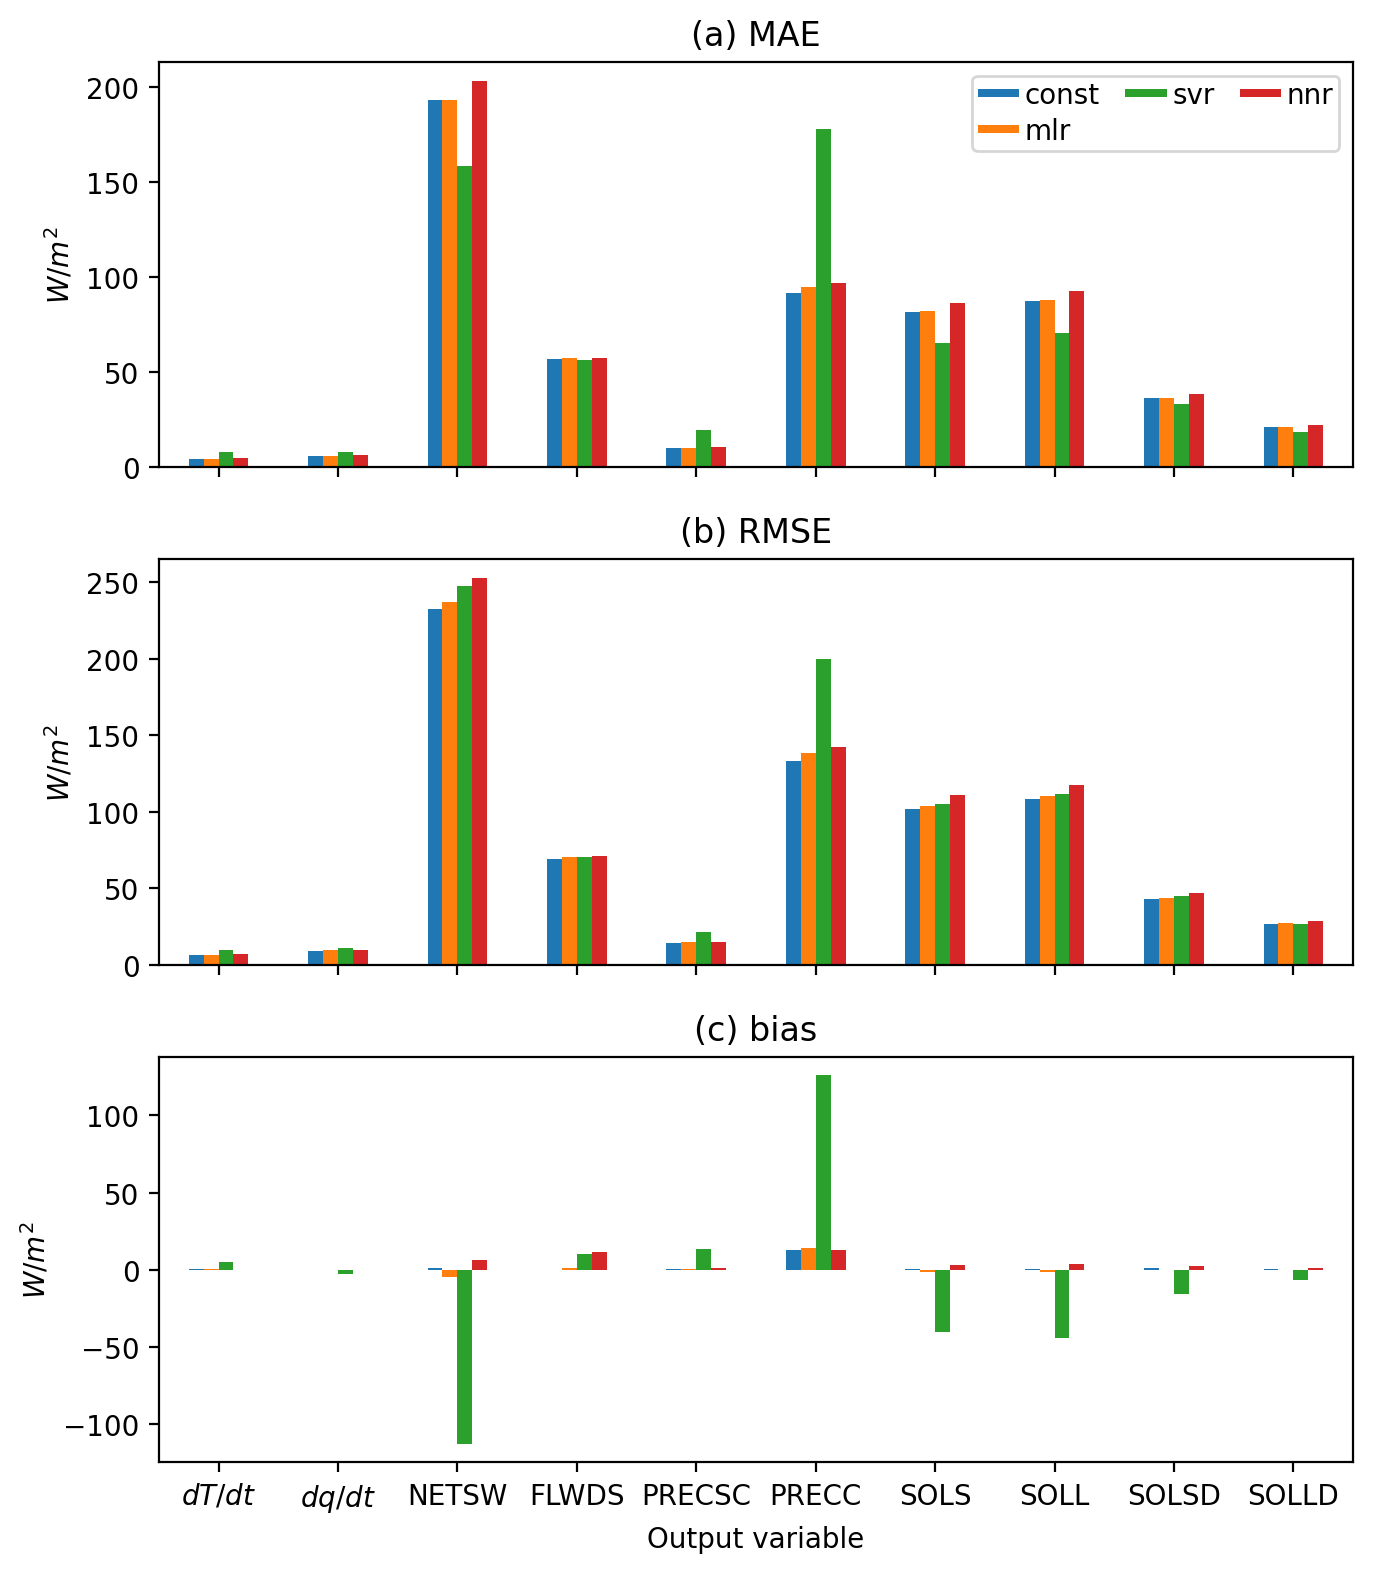

In [ ]:
# set plotting settings
%config InlineBackend.figure_format = 'retina'
letters = string.ascii_lowercase

# create custom dictionary for plotting
dict_var = data.metrics_var_scoring
plot_df_byvar = {}
for metric in data.metrics_names:
    plot_df_byvar[metric] = pd.DataFrame([dict_var[model][metric] for model in data.model_names],
                                               index=data.model_names)
    plot_df_byvar[metric] = plot_df_byvar[metric].rename(columns = data.var_short_names).transpose()

# plot figure
fig, axes = plt.subplots(nrows  = len(data.metrics_names), sharex = True)
for i in range(len(data.metrics_names)):
    plot_df_byvar[data.metrics_names[i]].plot.bar(
        legend = False,
        ax = axes[i])
    if data.metrics_names[i] != 'R2':
        axes[i].set_ylabel('$W/m^2$')
    else:
        axes[i].set_ylim(0,1)

    axes[i].set_title(f'({letters[i]}) {data.metrics_names[i]}')
axes[i].set_xlabel('Output variable')
axes[i].set_xticklabels(plot_df_byvar[data.metrics_names[i]].index, \
    rotation=0, ha='center')

axes[0].legend(columnspacing = .9,
               labelspacing = .3,
               handleheight = .07,
               handlelength = 1.5,
               handletextpad = .2,
               borderpad = .2,
               ncol = 3,
               loc = 'upper right')
fig.set_size_inches(7,8)
fig.tight_layout()